# Programming assignment 1: introductory tour and decision trees
Leo Carlsson and Efstathios Sidiropoulos. 

## Task 0: Making sure that you have the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

import matplotlib.pyplot as plt

## Task 1: A classification example: fetal heart condition diagnosis

### Step 1. Reading the data

In [2]:
# Read the CSV file.
url = "https://www.cse.chalmers.se/~richajo/dit866/data/CTG.csv"
data = pd.read_csv(url, skiprows=1)

In [3]:
data.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [4]:
# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

In [5]:
# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)
X

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,135.0,3.0,0.0,2.0,3.0,0.0,0.0,25.0,1.5,0.0,...,68.0,90.0,158.0,3.0,0.0,136.0,134.0,136.0,10.0,0.0
1731,134.0,9.0,1.0,11.0,6.0,0.0,0.0,61.0,1.1,0.0,...,109.0,80.0,189.0,10.0,0.0,156.0,144.0,151.0,61.0,0.0
763,129.0,3.0,1.0,0.0,0.0,0.0,0.0,59.0,0.9,21.0,...,118.0,66.0,184.0,18.0,0.0,133.0,135.0,137.0,7.0,0.0
835,128.0,3.0,0.0,1.0,5.0,0.0,0.0,16.0,3.3,0.0,...,114.0,57.0,171.0,6.0,1.0,136.0,130.0,136.0,26.0,1.0


In [6]:
# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)
Y

658      normal
1734     normal
1226     normal
1808     normal
825     suspect
         ...   
1033     normal
1731     normal
763      normal
835      normal
1653     normal
Name: NSP, Length: 2126, dtype: object

In [7]:
# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

### Step 2. Training the baseline classifier

In [8]:
#Initialize dummy classifier
clf = DummyClassifier(strategy='most_frequent')

In [9]:
cross_val_scores = cross_val_score(clf, Xtrain, Ytrain)
cross_val_scores

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

In [10]:
cross_val_score_agg = cross_val_scores.mean()
cross_val_score_agg

0.7805882352941176

### Step 3. Trying out some different classifiers

In [11]:
#Decision tree based classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Linear classifiers
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [12]:
#Test the basic classifiers
classifiers = [DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, Perceptron, LogisticRegression, LinearSVC]
model_accuracies = {}

for classifier in classifiers:
    model = classifier()
    model.fit(Xtrain, Ytrain)
    model_accuracies[type(model).__name__]  = np.mean(cross_val_score(model, Xtrain, Ytrain))



/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

### Step 4. Final evaluation

In [13]:
best_classifier = max(model_accuracies, key=model_accuracies.get)
print('The best classifier is {} with accuracy {:.3f}.'.format(best_classifier, model_accuracies[best_classifier]))

The best classifier is GradientBoostingClassifier with accuracy 0.949.


In [14]:
# unsure how to do your fancy automatic selection, is it possibe to select it from best_classifier?
best_model = GradientBoostingClassifier()
best_model.fit(Xtrain, Ytrain)
Ypred = best_model.predict(Xtest)
print(accuracy_score(Ytest, Ypred))

0.9295774647887324


When we evaluate the model with the best cross validation score, we get a slightly lower score on the test set. 

## Task 2: Decision trees for classification

In [15]:
from collections import Counter

from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point
  

def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [16]:
best_depth = []

for i in range(10):
  cls = TreeClassifier(max_depth=i)

  val_score = cross_val_score(cls, Xtrain, Ytrain)
  best_depth.append(np.mean(val_score))

max_val = max(best_depth)
index = best_depth.index(max_val)
print("Best max_depth is:", index+1)

cls = TreeClassifier(max_depth=index+1)
cls.fit(Xtrain, Ytrain)
Ypred = cls.predict(Xtest)
print(f"Test Accuracy is {np.round(accuracy_score(Ytest, Ypred), 3)}")

Best max_depth is: 6
Test Accuracy is 0.885


This method is not the best tuning method, since it results in different results each time. I've gotten everything from 1 to 6 in best depth. Most often though, 6 is chosen as the best depth.

For illustrative purposes a max depth of 3 is chosen:

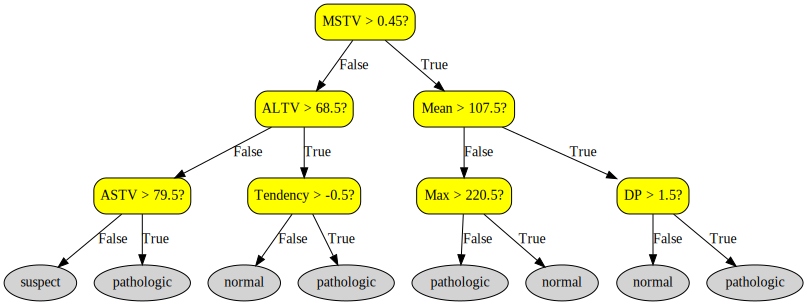

In [17]:
cls = TreeClassifier(max_depth=3)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

## Task 3: A regression example: predicting apartment prices

In [18]:
# Read the CSV file using Pandas.
url2 = "https://www.cse.chalmers.se/~richajo/dit866/data/sberbank.csv"
alldata = pd.read_csv(url2)

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.0017972 , 0.0010922 , 0.00095987, 0.00121808, 0.00147295]),
 'score_time': array([0.00035596, 0.00031686, 0.00033522, 0.00032783, 0.00037503]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [20]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()

# Create a Ridge Regression model
from sklearn.linear_model import Ridge
m2 = Ridge()

# Create a Lasso Regression model
from sklearn.linear_model import Lasso
m3 = Lasso()

# Create a Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
m4 = DecisionTreeRegressor()

# Create a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
m5 = RandomForestRegressor()

# Create a Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
m6 = GradientBoostingRegressor()

# Create a MLP Regressor model
from sklearn.neural_network import MLPRegressor
m7 = MLPRegressor()


models = [m1, m2, m3, m4, m5, m6, m7]

In [21]:
mses = {}

for model in models:
    model_name = type(model).__name__
    cv_score = cross_val_score(model, Xtrain, Ytrain, scoring='neg_mean_squared_error', cv=5)

    #Get MSE
    mse = abs(cv_score.mean())
    
    mses[model_name] = mse

In [22]:
mses

{'LinearRegression': 0.3013986588767211,
 'Ridge': 0.3013978423217976,
 'Lasso': 0.30104706717488716,
 'DecisionTreeRegressor': 0.5250637308659749,
 'RandomForestRegressor': 0.28319044087736933,
 'GradientBoostingRegressor': 0.26456855647896405,
 'MLPRegressor': 22033.922841253057}

In [23]:
best_regressor = min(mses, key=mses.get)
print('The best regressor is {} with MSE {:.3f}.'.format(best_regressor, mses[best_regressor]))

The best regressor is GradientBoostingRegressor with MSE 0.265.


In [24]:
from sklearn.metrics import mean_squared_error

best_model = GradientBoostingRegressor()
best_model.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, best_model.predict(Xtest))

0.2714725886671619

Which, again, perform slightly worse on the test set than in the cross validation.

## Task 4: Decision trees for regression

In [25]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
    def to_str(self, indent, lines, names):
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        lines.append(' '*indent + val_str)

In [26]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        
    def to_str(self, indent, lines, names):
        pad = ' '*indent
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lines.append(pad + f'{fname} <= {self.threshold:.3g}?')
        lines.append(pad + '  True =>')
        self.low_subtree.to_str(indent+4, lines, names)
        lines.append(pad + '  False =>')
        self.high_subtree.to_str(indent+4, lines, names)
        

In [27]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        
        _, best_feature, best_threshold = \
            max(self.best_split(X, Y, feature) 
                for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = \
            self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    def __str__(self):
        lines = []
        self.root.to_str(0, lines, self.names)
        return '\n'.join(lines)
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [28]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [29]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


### Step 1. Implementing the regression model

In [30]:
def mse_scorer(i, low_distr, n_high, high_distr):
    """
    i: the number of samples in the lower subset
    low_distr: a Counter containing the output values of the lower subset
    n_high: the number of samples in the upper subset
    high_distr: a Counter containing the output values of the upper subset
    """
    low_mean = sum(low_distr.values()) / i
    high_mean = sum(high_distr.values()) / n_high
    low_mse = sum((low_mean - k) ** 2 * v for k, v in low_distr.items())
    high_mse = sum((high_mean - k) ** 2 * v for k, v in high_distr.items())
    total_mse = low_mse + high_mse
    return total_mse

def variance_scorer(i, low_distr, n_high, high_distr):
    """
    i: the number of samples in the lower subset
    low_distr: a Counter containing the output values of the lower subset
    n_high: the number of samples in the upper subset
    high_distr: a Counter containing the output values of the upper subset
    """
    low_mean = sum(low_distr.values()) / i
    high_mean = sum(high_distr.values()) / n_high
    low_var = sum((low_mean - k) ** 2 * v for k, v in low_distr.items()) / i
    high_var = sum((high_mean - k) ** 2 * v for k, v in high_distr.items()) / n_high
    total_var = low_var + high_var
    return total_var

In [31]:
from collections import Counter
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='mse'):
        super().__init__(max_depth)
        self.criterion = criterion

    def fit(self, X, Y):
        # For decision tree regressor, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'mse':
            self.criterion_function = mse_scorer
        elif self.criterion == 'variance':
            self.criterion_function = variance_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean value.
    def get_default_value(self, Y):
        return np.mean(Y)

    # Checks whether a set of output values is homogeneous. In the regression case, 
    # this means that the variance of the output values is small. 
    
    # Epsilon is an arbitrarily chosen small value.
    def is_homogeneous(self, Y, epsilon = 1e-5):
        return np.var(Y) < epsilon

    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)
        low_distr = Counter()
        high_distr = Counter(Y)

        max_score = -np.inf
        max_i = None

        for i in range(0, n-1):
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            if score > max_score:
                max_score = score
                max_i = i

        if max_i is None:
            return -np.inf, None, None
        else:
            threshold = (X_sorted[max_i] + X_sorted[max_i+1]) / 2
            return max_score, feature, threshold


The criterion parameter, which can be either 'mse' or 'variance', is used to specify the function that will be used to measure the homogeneity of subsets in the dataset.

Because the MSE criterion is a widely used and recognized indicator of model performance for regression issues, we have decided to incorporate it in our approach. MSE is a well-known criterion since it can be used in optimization methods and is differentiable. This makes it an appropriate criterion for assessing the homogeneity of dataset subsets.

### Step 2. Sanity check

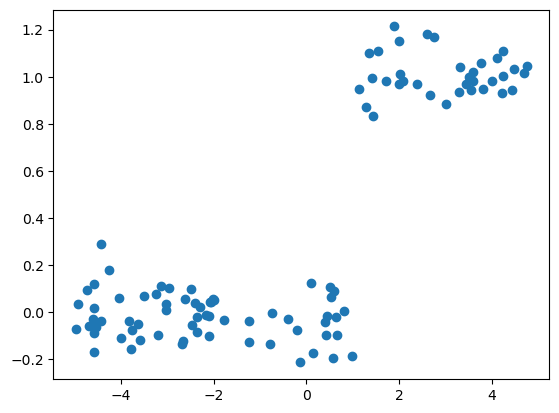

In [32]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(100)
plt.scatter(X, Y)

Given this data, a split around the maybe X = 0.1, where if X < 0.1 it would predict 0, else 1.

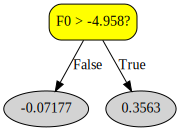

In [33]:
tree= TreeRegressor(criterion= "variance", max_depth= 1)
tree.fit(X, Y)
tree.draw_tree()

At this stage we realised we calculated the variance reduction wrong, and we used an older, but slower, TreeRegressor class instead, as seen below. The negative thing with this is that it takes way to long to be practically usefull for the real dataset, since we never understood the alternative variance reduction hint. 

Therefore, we will use a sample of 20 % of the data in the tasks following, just so it still completes in a managable time. 

/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


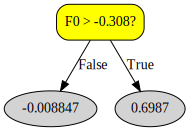

In [34]:
from sklearn.base import RegressorMixin
import numpy as np

class TreeRegressor(DecisionTree, RegressorMixin):
    def __init__(self, max_depth=10, min_var = 1e-5):
        super().__init__(max_depth)
        self.min_var = min_var
        
    def fit(self, X, Y):
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf, using the mean
    def get_default_value(self, Y):
        return np.mean(Y)
    
    # Checks whether a set of output values is homogeneous. 
    def is_homogeneous(self, Y):
        return np.var(Y) < self.min_var    
        
    # Finds the best splitting point for a given feature using minimising variance
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Split in High and low parts at index of the set
            S = X_sorted
            S_h = X_sorted[i:]
            S_l = X_sorted[:i]

            sq_high = np.sum(np.power(S_h, 2))
            sq_low = high = np.sum(np.power(S_h, 2))
            
            sum_low = np.sum(S_l)
            sum_high = np.sum(S_h)

            

            score = np.var(S) - np.size(S_h) / np.size(S) * np.var(S_h) - np.size(S_l) / np.size(S) * np.var(S_l)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

tree = TreeRegressor(max_depth= 1)
tree.fit(X, Y)
tree.draw_tree()

### Step 3. Predicting apartment prices using decision tree regression

In [35]:
url = "https://www.cse.chalmers.se/~richajo/dit866/data/sberbank.csv"

# Read the CSV file using Pandas.
alldata = pd.read_csv(url)

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=0.2, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


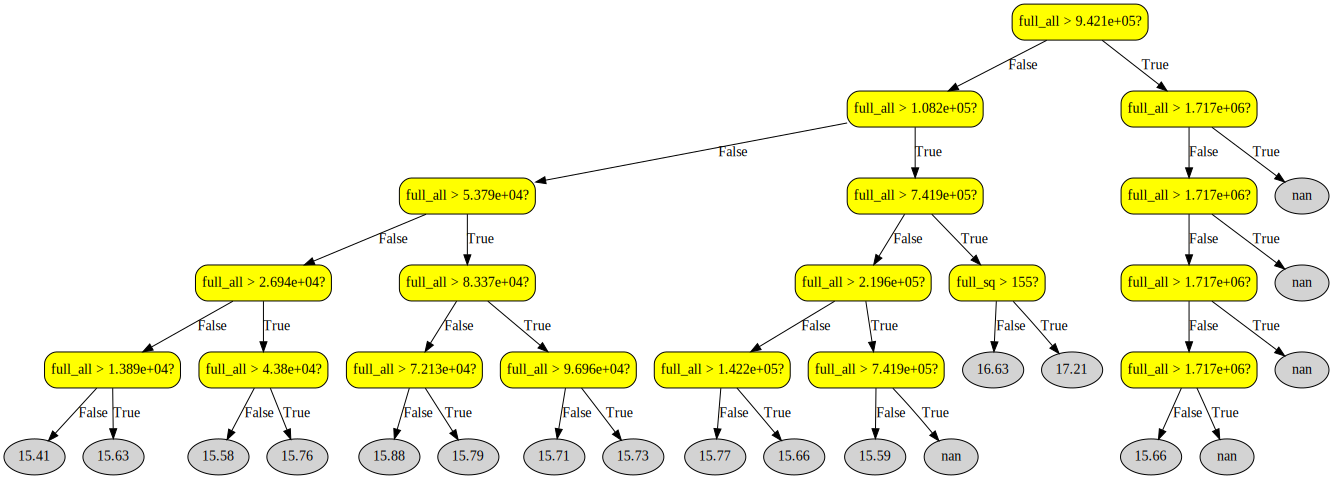

In [36]:
tree = TreeRegressor(max_depth= 5)
tree.fit(Xtrain, Ytrain)
tree.draw_tree()

In [37]:
Ypreds = tree.predict(Xtest)
Counter(Ypreds)

Counter({15.774999044335733: 94,
         15.63357245412987: 43,
         15.585357025478482: 32,
         15.714953359592535: 88,
         15.66101625881264: 39,
         15.655884154863209: 69,
         15.790982979315274: 75,
         15.584829355020602: 54,
         15.409026652501758: 54,
         15.882056742706123: 64,
         15.726975381624214: 49,
         15.759719119556605: 8,
         16.63245873156029: 2})

In [38]:
mean_squared_error(Ytest, Ypreds)

0.34394513721679826

/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divi

Text(0.5, 1.0, 'Train and test Mean Squared Errors')

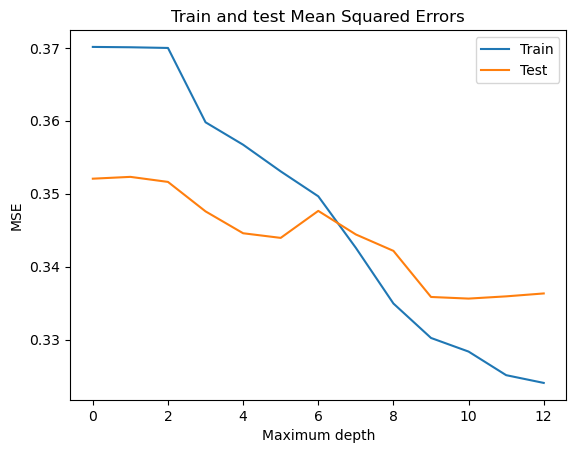

In [39]:
def evaluate_model(max_depth,x_test, y_test):
  evaluation = []
  for n in range(max_depth+1):
    eval_tree = TreeRegressor(max_depth=n)
    eval_tree.fit(Xtrain, Ytrain)
    eval_preds = eval_tree.predict(x_test)
    evaluation.append(mean_squared_error(y_test, eval_preds))

  return evaluation

train_evaluation = evaluate_model(12, Xtrain, Ytrain)
test_evaluation = evaluate_model(12, Xtest, Ytest)

plt.plot(train_evaluation)
plt.plot(test_evaluation)
plt.legend(['Train', 'Test'])
plt.xlabel('Maximum depth')
plt.ylabel('MSE')
plt.title('Train and test Mean Squared Errors')

As the maximum depth of the tree is changed, the two curves in the plot show the mean squared error (MSE) of the decision tree regressor model. The MSE on the training dataset is represented by the train curve, and the MSE on the test dataset is represented by the test curve.

On this subset, the model is underfitting at low depth, and overfitting at a higher depth. This indicates that the model cannot generalize well to new data and cannot sufficiently reflect the underlying patterns in the data. This can occur when the model is overly simplistic or is not given enough detail to learn from the data. We are experimenting in searching for the maximum depth whose ideal value has the lowest test error curve, which in our case would be 12, as we have tested for values from 0 to 12 and we see MSE declining as the depth is increasing. 

In summary, the plot shows that the model is underfitting when the maximum depth is low and overfitting when the maximum depth is high, which can be observed by the difference between the train and test MSE curves. In the end, it is an optimization problem, balancing the depth of the tree so it fits our dataset the best. It should be noted that this is a simplistic example as we are only tuning the depth of the tree, an no other hyperparameters. We could also experiment with increasing the quantity of training data points, applying regularization strategies like pruning, or even rejecting this specific model/algorithm for the this data set.

Given that we had the time to train this in the entire dataset, our predictions is that the test curve always would be above the train curve, but both would be slowly decreasing. However, given the small number in the Test set at this level, there's not enough data for this pattern to emerge.

# Appendix
The following class is the furtherst we got to a functioning class using the alternative variance calculation method. It works okay on the toy data, but breaks on the larger dataset where it somewhere spawns a NaN. We would greatly apprechiate feedback on where we've made a mistake, since we cant find it and want to learn. 

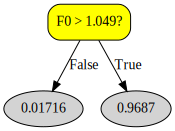

In [40]:
from sklearn.base import RegressorMixin
import numpy as np

def get_variance(n, sum_of_x, sum_of_sqr):
    return ((1/n)*sum_of_sqr/n) - 1/n**2*sum_of_x**2

def variance_reduction(var_all, var_l, var_h, n_all, n_l, n_h):
    return var_all - (n_h / n_all * var_h) - (n_l / n_all * var_l)


class TreeRegressor(DecisionTree, RegressorMixin):
    def __init__(self, max_depth=10, min_var = 0.000001):
        super().__init__(max_depth)
        self.min_var = min_var
        
    def fit(self, X, Y):
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf, using the mean
    def get_default_value(self, Y):
        return np.mean(Y)
    
    # Checks whether a set of output values is homogeneous. 
    def is_homogeneous(self, Y):
        return np.var(Y) < self.min_var

    # Finds the best splitting point for a given feature using minimising variance
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Split in High and low parts at index of the set
        S_all = Y_sorted
        S_h = Y_sorted[1:]
        S_l = Y_sorted[:1]

        sum_high = np.sum(S_h)
        sum_low = np.sum(S_l)
        sum_all = np.sum(S_all)

        sq_high = np.sum(np.power(S_h, 2))
        sq_low = np.sum(np.power(S_l, 2))
        sq_all = np.sum(np.power(S_all, 2))

        n_high = np.size(S_h)
        n_low = np.size(S_l)
        n = np.size(S_all)

        var = np.var(Y_sorted)

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            var_high = get_variance(n_high, sum_high, sq_high)
            var_low = get_variance(n_low, sum_low, sq_low)

            score = variance_reduction(var_all=var, var_l=var_low, var_h=var_high, n_all=n, n_l=n_low, n_h=n_high)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

            sq_high -= S_all[i]**2
            sq_low += S_all[i]**2
            sum_high -= S_all[i]
            sum_low += S_all[i]
            n_high -= 1
            n_low += 1


        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(100)
tree_reg = TreeRegressor(max_depth=1)
tree_reg.fit(X, Y)
tree_reg.draw_tree()

/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


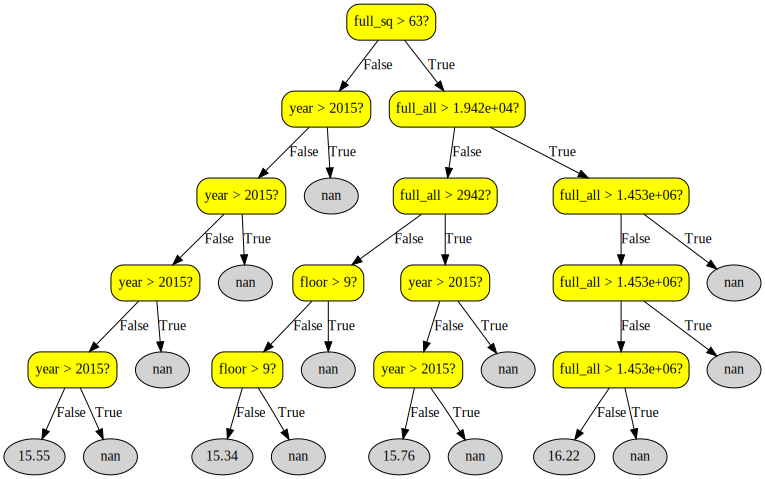

In [41]:
tree_reg = TreeRegressor(max_depth=5)
tree_reg.fit(Xtrain, Ytrain)
tree_reg.draw_tree()

In [42]:
from sklearn.metrics import mean_squared_error

def evaluate_model(max_depth,x_test, y_test):
  evaluation = []
  for n in range(max_depth+1):
    eval_tree = TreeRegressor(max_depth=n)
    eval_tree.fit(Xtrain, Ytrain)
    eval_preds = eval_tree.predict(x_test)
    evaluation.append(mean_squared_error(y_test, eval_preds))

  return evaluation

train_evaluation = evaluate_model(12, Xtrain, Ytrain)
test_evaluation = evaluate_model(12, Xtest, Ytest)

plt.plot(train_evaluation)
plt.plot(test_evaluation)
plt.legend(['Train', 'Test'])
plt.xlabel('Maximum depth')
plt.ylabel('MSE')
plt.title('Train and test Mean Squared Errors')

/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/leocarlsson/opt/anaconda3/lib/python3.9/site-p

ValueError: Input contains NaN.